In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [ ]:
df = pd.read_csv('/content/customer_churn_final.csv')

print("=" * 80)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print("\n✅ Data loaded!")


DATASET LOADED SUCCESSFULLY

Dataset Shape: (355190, 25)
Total Rows: 355,190
Total Columns: 25

✅ Data loaded!


In [ ]:
print("=" * 80)
print("FIRST 10 ROWS OF DATA")
print("=" * 80)
print(df.head(5))

print("\n" + "=" * 80)
print("LAST 5 ROWS OF DATA")
print("=" * 80)
print(df.tail())

FIRST 10 ROWS OF DATA
   customer_id  churn  age marital_status education  salary  \
0       146841      0  660            NaN       NaN     NaN   
1       146842      0  552            NaN       NaN     NaN   
2       146843      0  420            NaN       NaN     NaN   
3       146844      0  372            NaN       NaN     NaN   
4       146845      0  288            NaN       NaN     NaN   

   account_tenure_months  credit_cards_count  installment_loans_count  \
0               1.593023                   0                        0   
1               1.587647                   0                        0   
2               1.587647                   0                        0   
3               1.583333                   0                        0   
4               1.583333                   0                        0   

   ccfp_products_count  ... mobile_banking_usage_pct  avg_current_balance  \
0                    0  ...                      NaN        156067.339767   
1     

In [ ]:
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("COLUMN NAMES")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\n" + "=" * 80)
print("DATA TYPES SUMMARY")
print("=" * 80)
print(df.dtypes.value_counts())

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    355190 non-null  int64  
 1   churn                          355190 non-null  int64  
 2   age                            355190 non-null  int64  
 3   marital_status                 68234 non-null   object 
 4   education                      68104 non-null   object 
 5   salary                         712 non-null     float64
 6   account_tenure_months          355190 non-null  float64
 7   credit_cards_count             355190 non-null  int64  
 8   installment_loans_count        355190 non-null  int64  
 9   ccfp_products_count            355190 non-null  int64  
 10  package_type                   355190 non-null  object 
 11  atm_trans_count_3m             255595 non-null  float64
 12  atm_trans_

MISSING VALUES ANALYSIS
                      Column  Missing_Count  Missing_Percentage
5                     salary         354478           99.799544
24        debt_to_loan_ratio         353302           99.468454
21      monthly_loan_payment         353302           99.468454
23    delinquency_percentage         347189           97.747403
22         max_interest_rate         347189           97.747403
4                  education         287086           80.826037
3             marital_status         286956           80.789437
15  mobile_banking_usage_pct         200027           56.315493
11        atm_trans_count_3m          99595           28.039922
12       atm_trans_amount_3m          99595           28.039922
14     total_trans_amount_3m          51996           14.638926
13      total_trans_count_3m          51996           14.638926


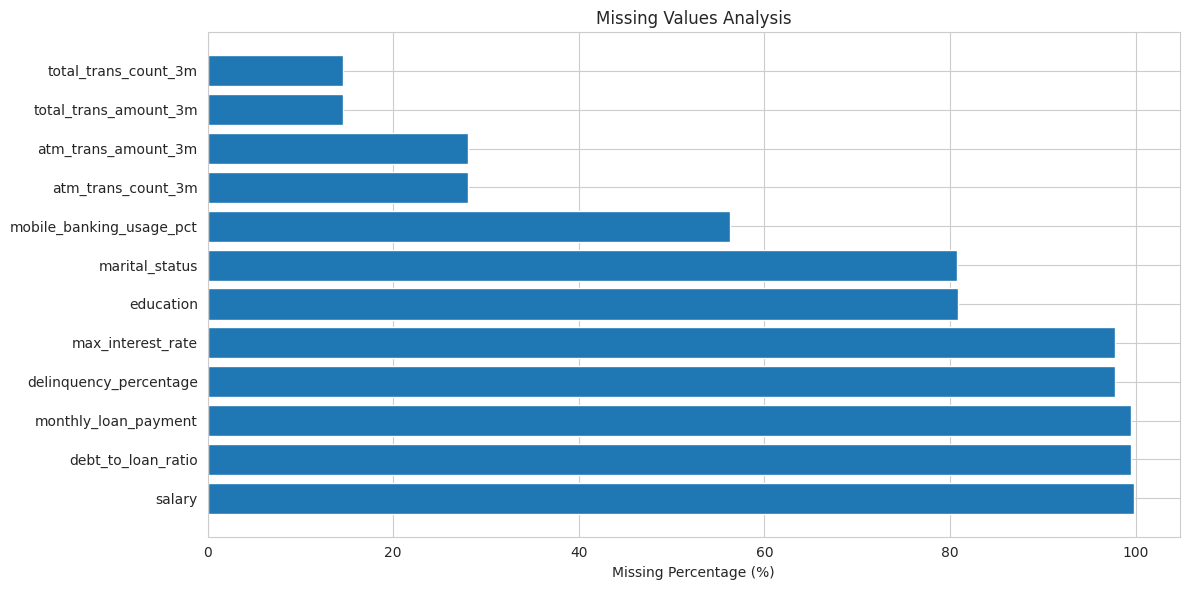

In [ ]:
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) == 0:
    print("✅ No missing values found!")
else:
    print(missing_df)

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values Analysis')
    plt.tight_layout()
    plt.show()

In [ ]:
print("=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 80)
print(df.describe().T)

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY - ALL FEATURES")
print("=" * 80)
print(df.describe(include='all').T)


STATISTICAL SUMMARY - NUMERICAL FEATURES
                                  count           mean            std  \
customer_id                    355190.0  368794.674875  128148.804566   
churn                          355190.0       0.081435       0.273503   
age                            355190.0     457.148073     136.435457   
salary                            712.0   37060.533806   55084.111834   
account_tenure_months          355190.0       4.377001       2.936530   
credit_cards_count             355190.0       0.071531       0.294748   
installment_loans_count        355190.0       0.105225       0.431372   
ccfp_products_count            355190.0       0.004944       0.076439   
atm_trans_count_3m             255595.0       0.628063       0.263095   
atm_trans_amount_3m            255595.0       0.617506       0.302799   
total_trans_count_3m           303194.0       0.597247       0.247131   
total_trans_amount_3m          303194.0       0.582237       0.282157   
mobile_ban

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID and target from analysis lists
if 'customer_id' in numerical_cols:
    numerical_cols.remove('customer_id')
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')

print("=" * 80)
print("FEATURE TYPES")
print("=" * 80)
print(f"\nTotal Features: {len(df.columns)}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")

print("\n📊 Numerical Features:")
for i, col in enumerate(numerical_cols, 1):
    print(f"{i:2}. {col}")

print("\n📝 Categorical Features:")
for i, col in enumerate(categorical_cols, 1):
    print(f"{i:2}. {col}")



FEATURE TYPES

Total Features: 25
Numerical Features: 20
Categorical Features: 3

📊 Numerical Features:
 1. age
 2. salary
 3. account_tenure_months
 4. credit_cards_count
 5. installment_loans_count
 6. ccfp_products_count
 7. atm_trans_count_3m
 8. atm_trans_amount_3m
 9. total_trans_count_3m
10. total_trans_amount_3m
11. mobile_banking_usage_pct
12. avg_current_balance
13. avg_payment_balance
14. credit_card_balance_change_3m
15. credit_card_turnover
16. payment_turnover
17. monthly_loan_payment
18. max_interest_rate
19. delinquency_percentage
20. debt_to_loan_ratio

📝 Categorical Features:
 1. marital_status
 2. education
 3. package_type


TARGET VARIABLE ANALYSIS - CHURN

Churn Distribution:
churn
0    326265
1     28925
Name: count, dtype: int64

Churn Percentage:
churn
0    91.856471
1     8.143529
Name: proportion, dtype: float64

📊 Churn Rate: 8.14%
📊 Retention Rate: 91.86%


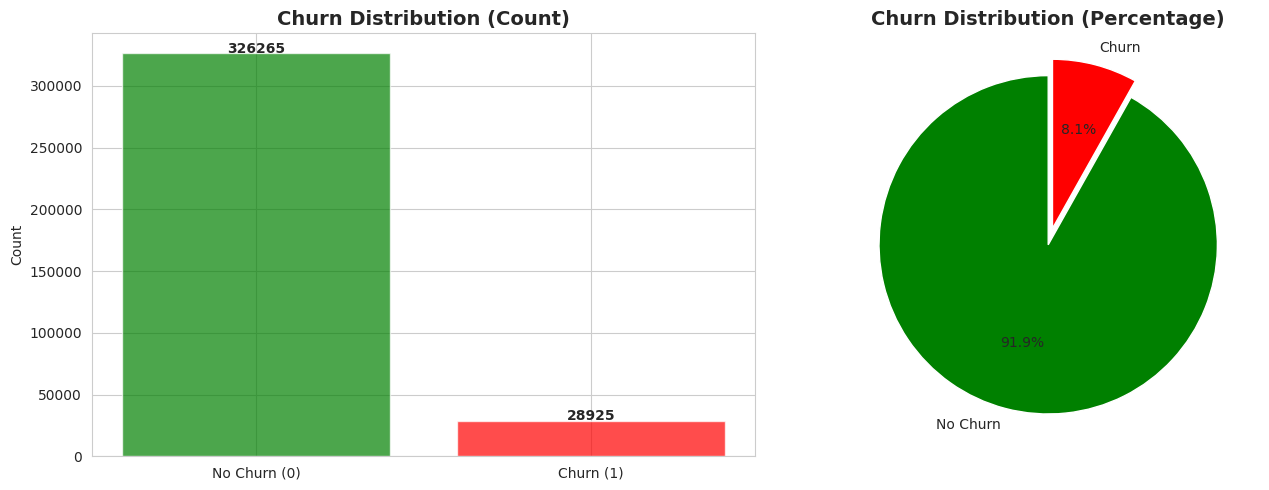


⚠️ WARNING: Class Imbalance Detected!
   Consider using SMOTE or class weights in modeling


In [ ]:
print("=" * 80)
print("TARGET VARIABLE ANALYSIS - CHURN")
print("=" * 80)

# Count of each class
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

print("\nChurn Distribution:")
print(churn_counts)
print("\nChurn Percentage:")
print(churn_pct)

# Calculate churn rate
churn_rate = (churn_counts[1] / len(df)) * 100
print(f"\n📊 Churn Rate: {churn_rate:.2f}%")
print(f"📊 Retention Rate: {100-churn_rate:.2f}%")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['No Churn (0)', 'Churn (1)'], churn_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
            colors=['green', 'red'], startangle=90, explode=[0, 0.1])
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
if churn_pct.min() < 20:
    print("\n⚠️ WARNING: Class Imbalance Detected!")
    print("   Consider using SMOTE or class weights in modeling")
else:
    print("\n✅ Classes are relatively balanced")



NUMERICAL FEATURES DISTRIBUTION


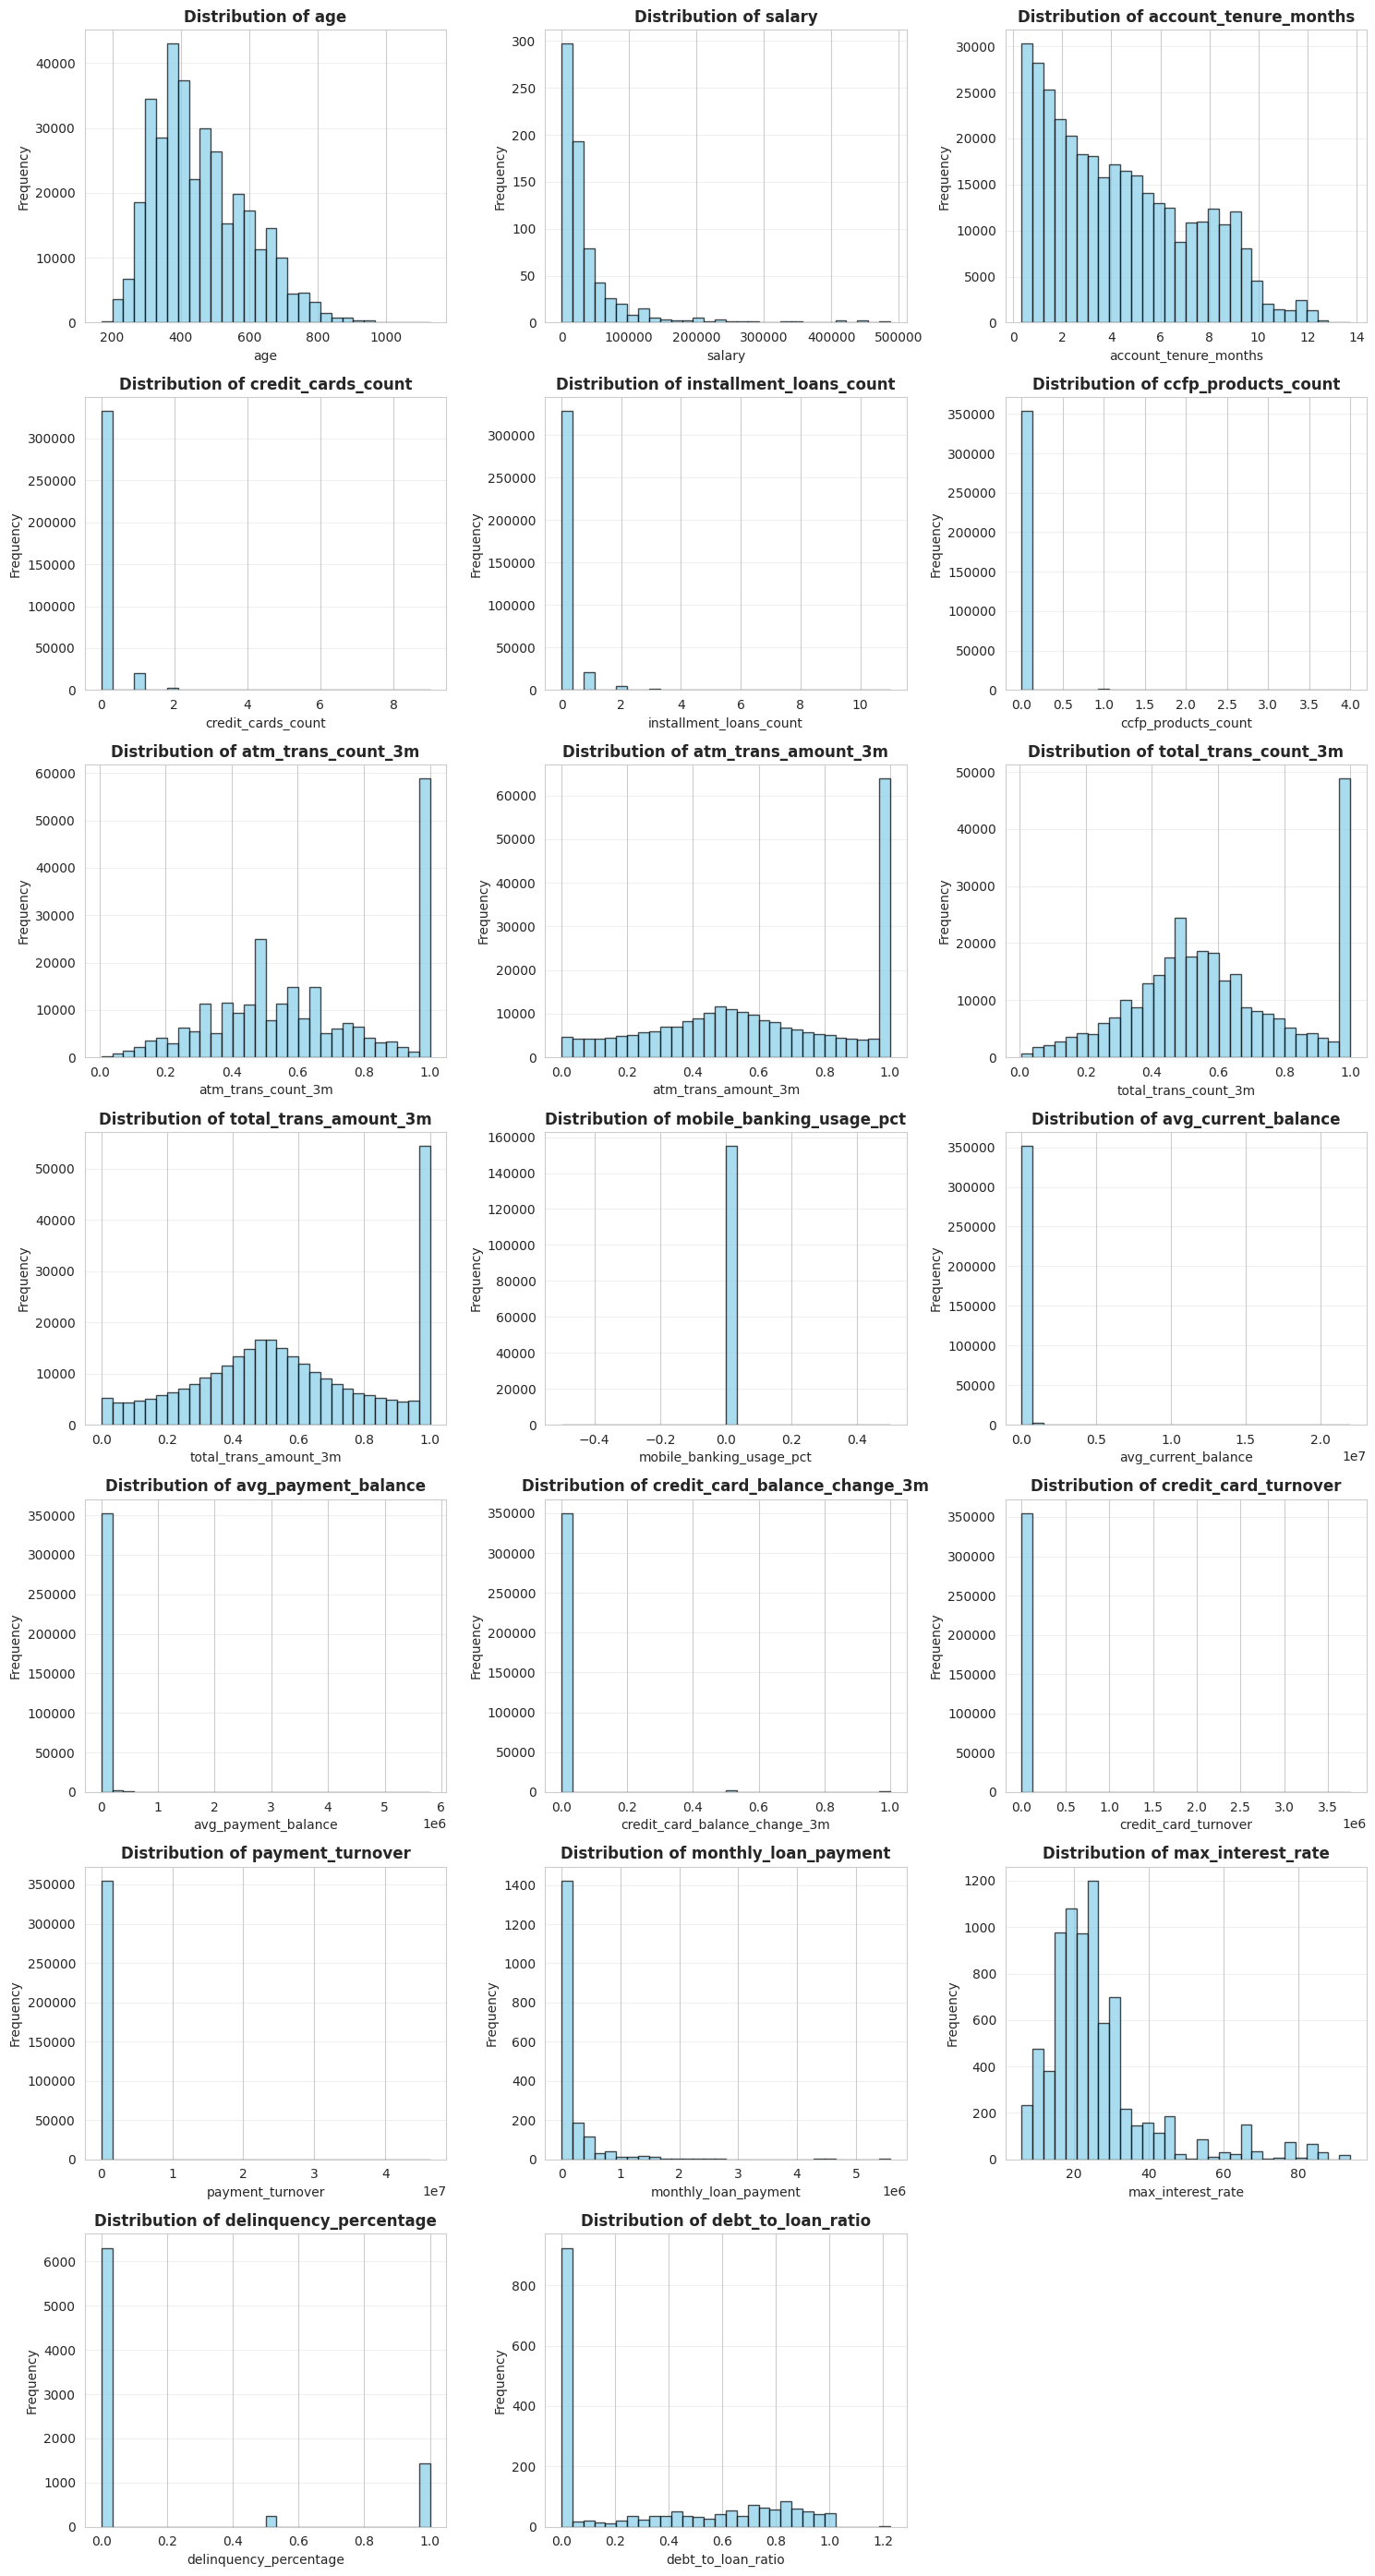

In [ ]:
print("=" * 80)
print("NUMERICAL FEATURES DISTRIBUTION")
print("=" * 80)

# Plot distributions
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.3)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



CATEGORICAL FEATURES ANALYSIS

marital_status:
marital_status
M    30724
V    22207
D     7379
T     3224
m     1461
N      936
v      868
W      646
d      398
t      168
C      155
w       51
        17
Name: count, dtype: int64
Unique values: 13

education:
education
H     42459
SS    10235
UH     6254
S      3275
HH     1930
h      1911
s       605
A       536
i       380
US      201
I       195
HI       52
a        36
e        14
E         9
AC        7
AV        5
Name: count, dtype: int64
Unique values: 17

package_type:
package_type
102    116986
K01     77083
O01     50478
105     44936
107     27952
103     24860
104      6776
301      4208
101      1816
109        86
M01         7
108         2
Name: count, dtype: int64
Unique values: 12


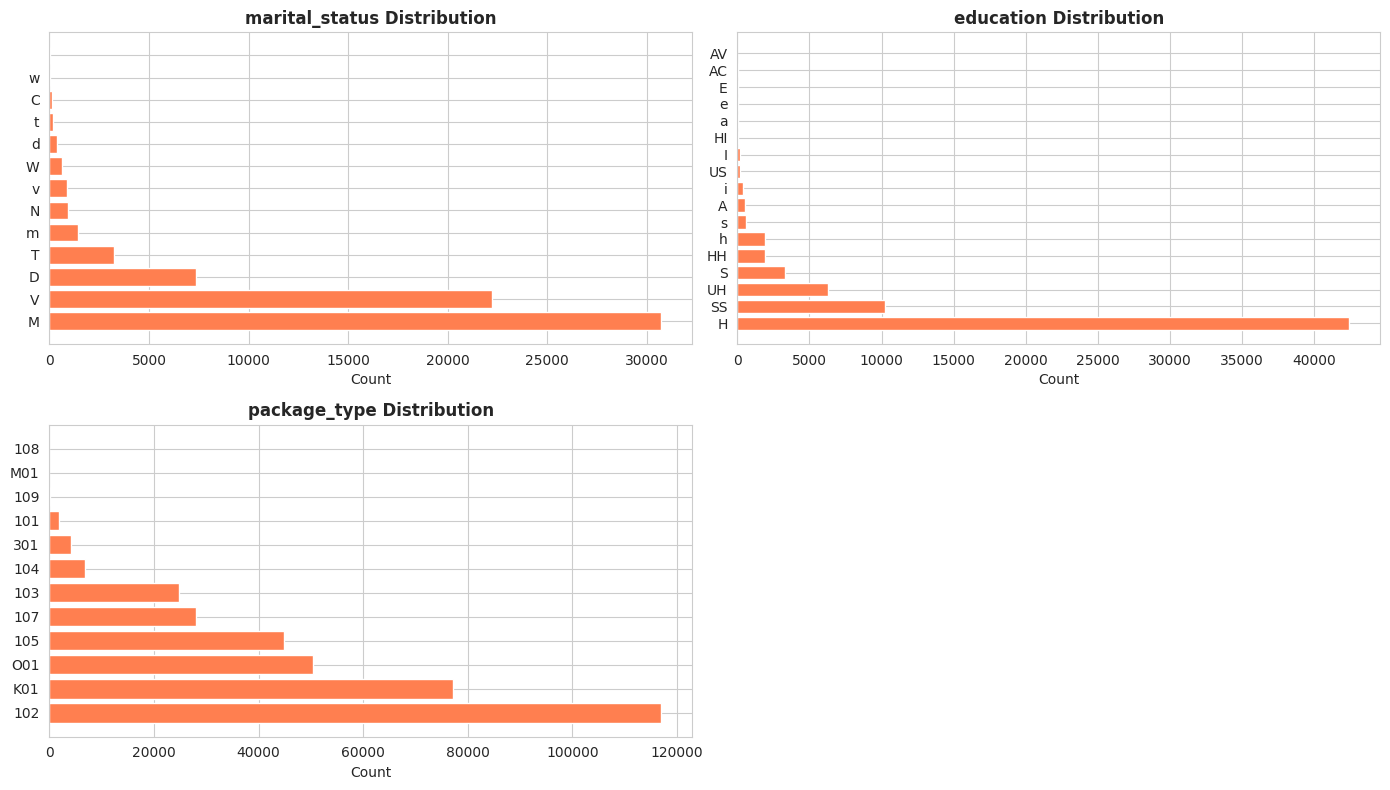

In [ ]:
print("=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")

    # Visualize categorical features
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        axes[i].barh(value_counts.index.astype(str), value_counts.values, color='coral')
        axes[i].set_title(f'{col} Distribution', fontweight='bold')
        axes[i].set_xlabel('Count')

    # Hide extra subplots
    for j in range(len(categorical_cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features found!")

CORRELATION ANALYSIS

Correlation with Target (Churn):
churn                            1.000000
total_trans_amount_3m            0.058932
total_trans_count_3m             0.055049
atm_trans_amount_3m              0.052020
atm_trans_count_3m               0.051893
max_interest_rate                0.019404
installment_loans_count          0.013276
salary                           0.011561
ccfp_products_count              0.006868
payment_turnover                 0.004051
credit_card_turnover            -0.002944
credit_card_balance_change_3m   -0.010248
credit_cards_count              -0.013237
avg_payment_balance             -0.014791
age                             -0.041184
avg_current_balance             -0.075460
account_tenure_months           -0.081673
delinquency_percentage          -0.085575
monthly_loan_payment            -0.087085
debt_to_loan_ratio              -0.166190
mobile_banking_usage_pct              NaN
Name: churn, dtype: float64


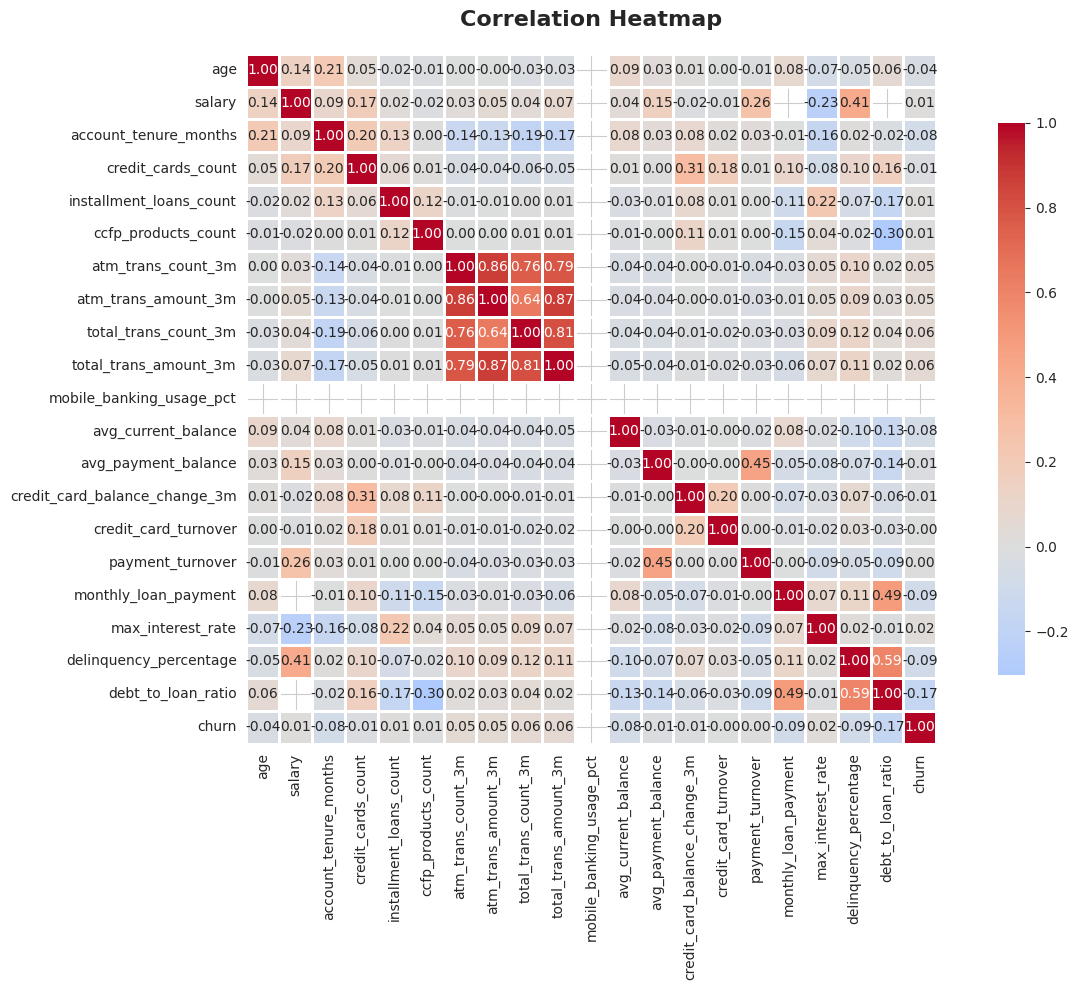


TOP 10 FEATURES MOST CORRELATED WITH CHURN
debt_to_loan_ratio        0.166190
monthly_loan_payment      0.087085
delinquency_percentage    0.085575
account_tenure_months     0.081673
avg_current_balance       0.075460
total_trans_amount_3m     0.058932
total_trans_count_3m      0.055049
atm_trans_amount_3m       0.052020
atm_trans_count_3m        0.051893
age                       0.041184
Name: churn, dtype: float64


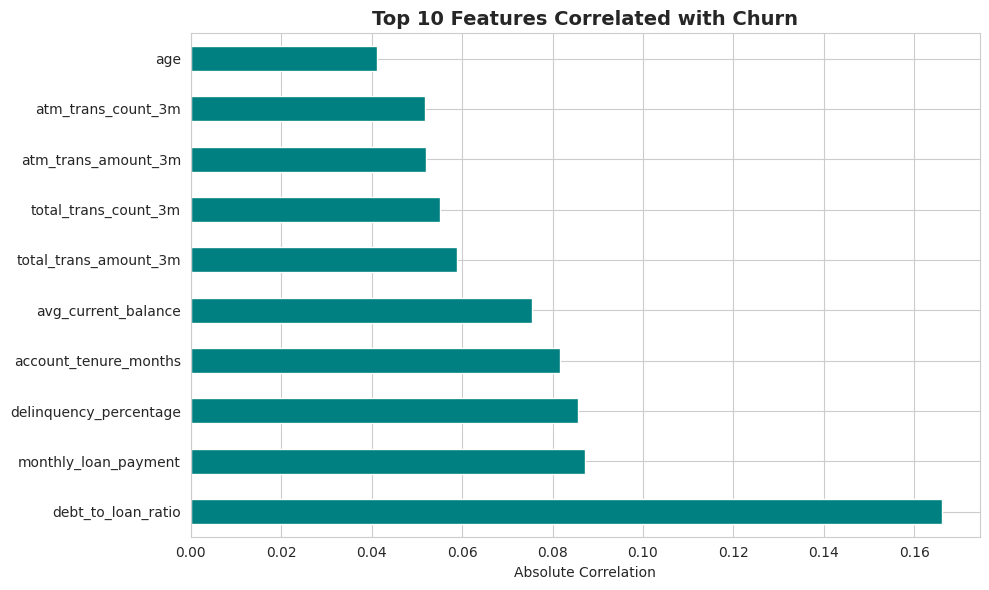

In [ ]:
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_matrix = df[numerical_cols + ['churn']].corr()

# Correlation with target variable
target_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print("\nCorrelation with Target (Churn):")
print(target_correlation)

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with churn
print("\n" + "=" * 80)
print("TOP 10 FEATURES MOST CORRELATED WITH CHURN")
print("=" * 80)
top_corr = target_correlation.drop('churn').abs().sort_values(ascending=False).head(10)
print(top_corr)

# Visualize top correlations
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='teal')
plt.title('Top 10 Features Correlated with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

OUTLIER DETECTION - BOX PLOTS


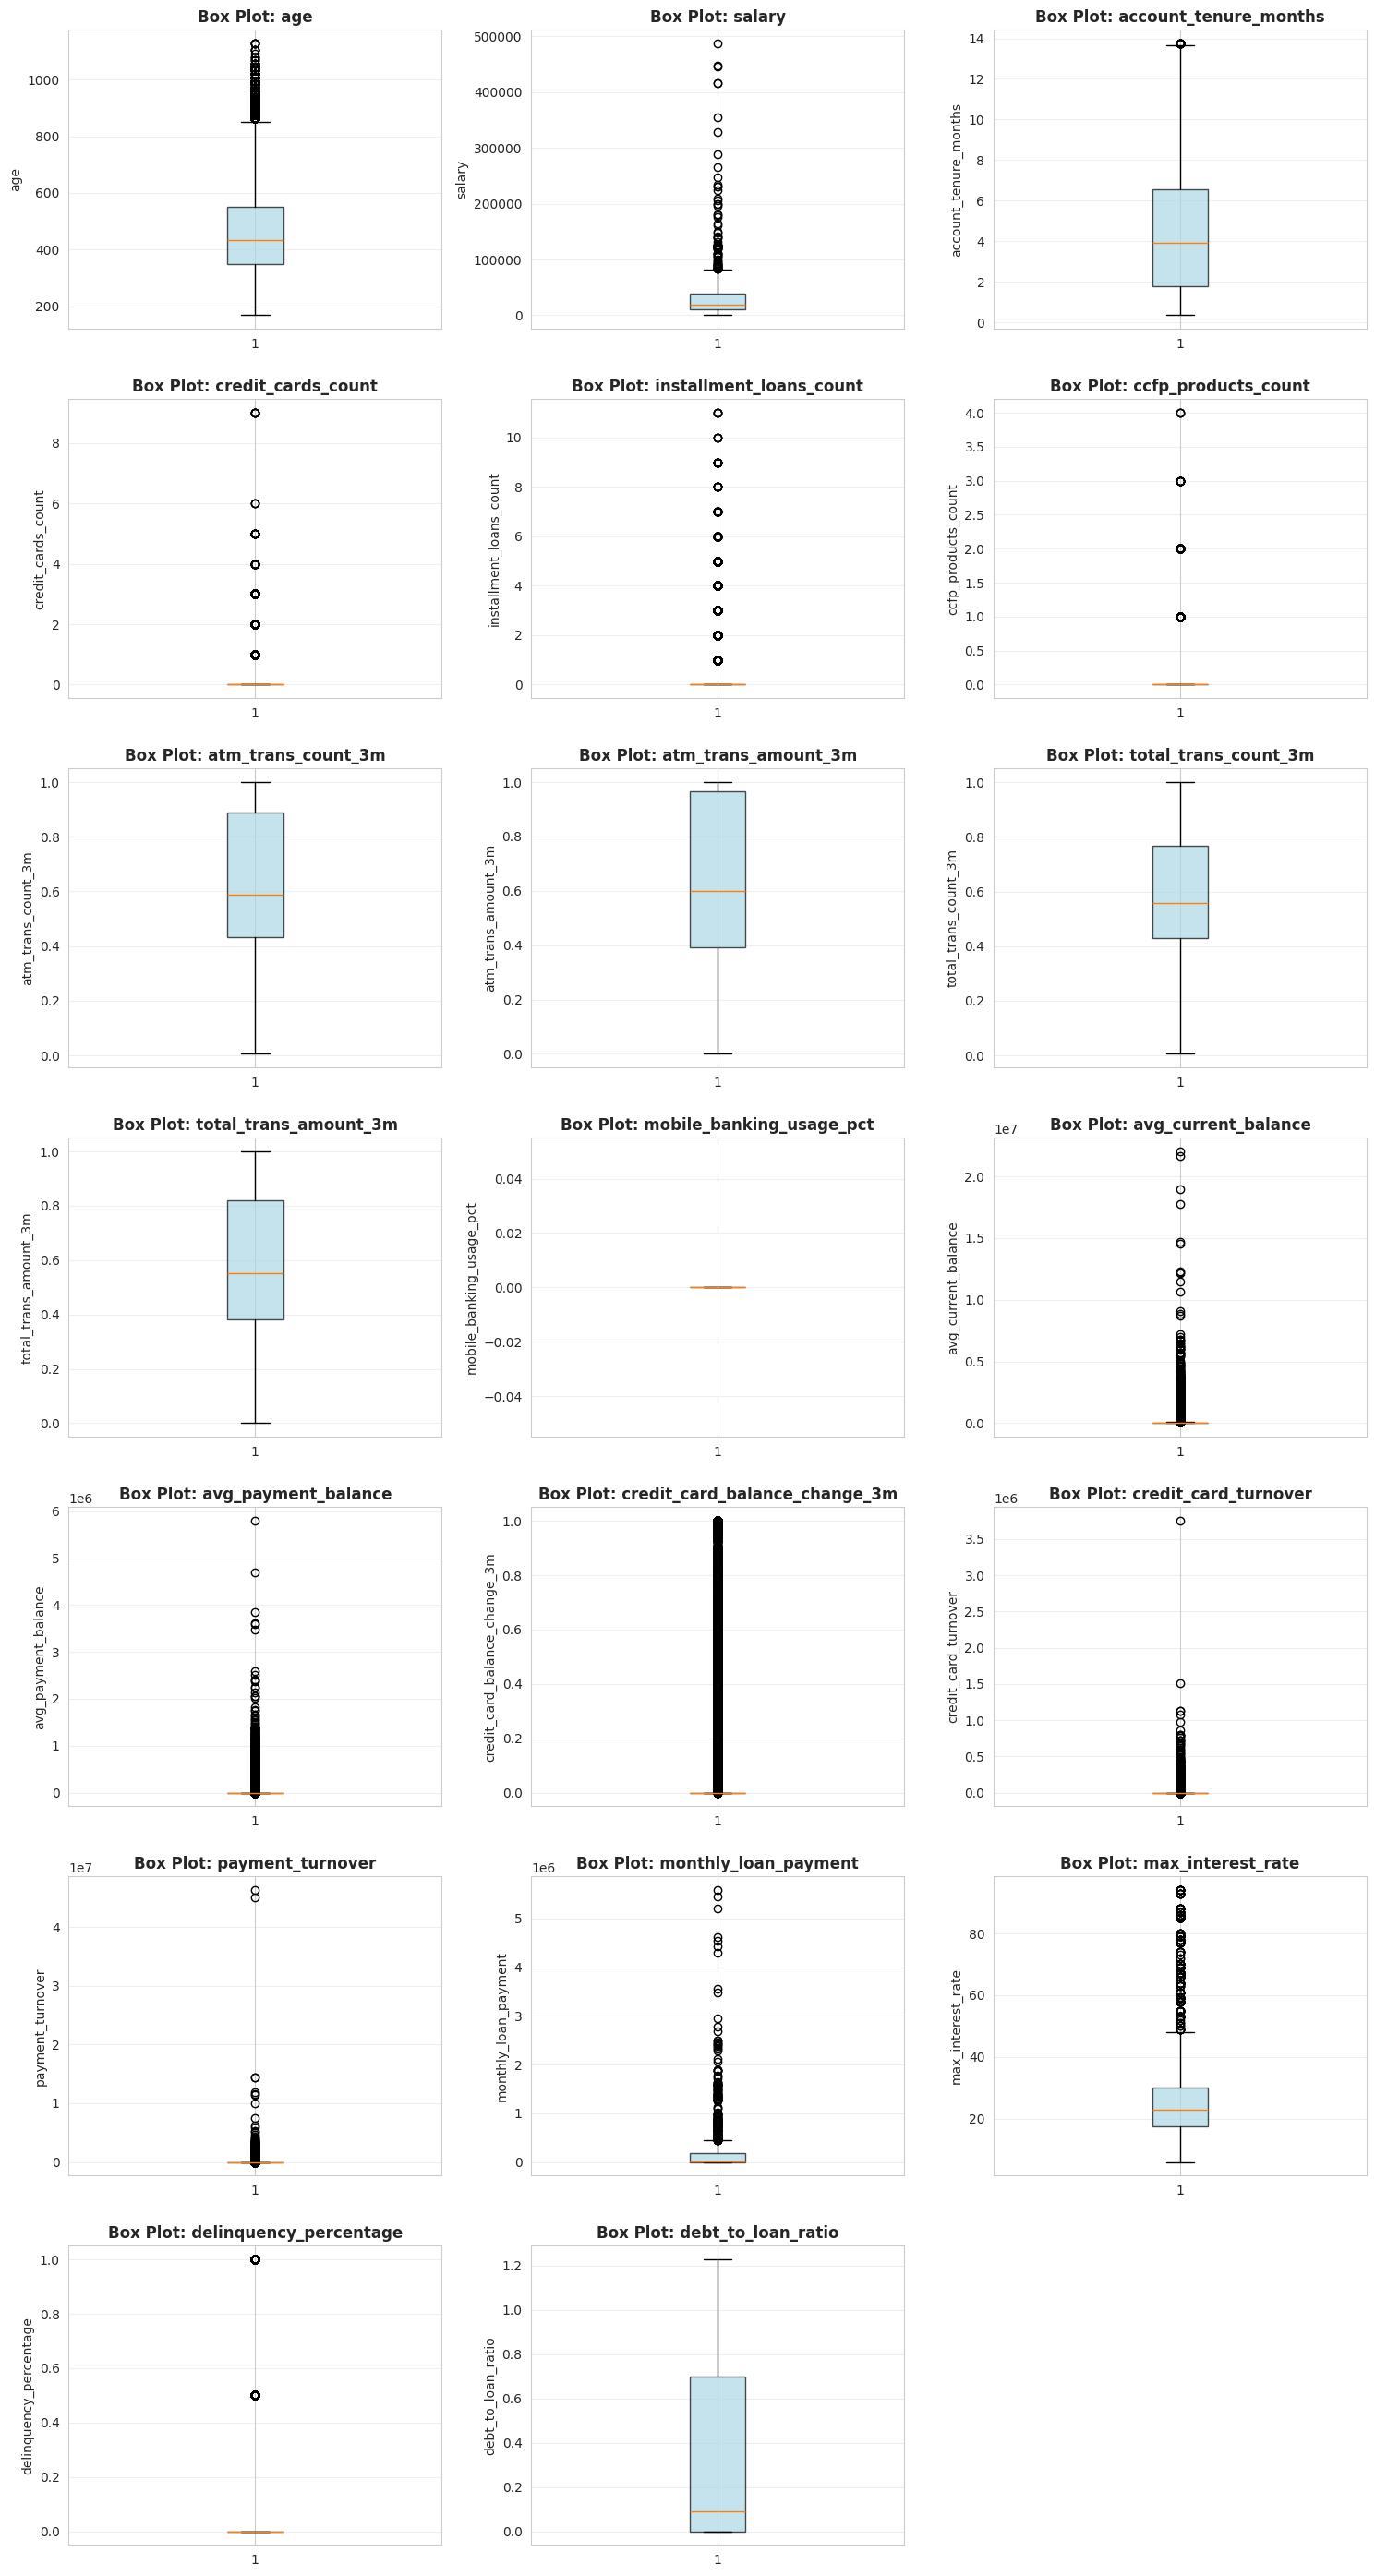


OUTLIER STATISTICS (IQR Method)

age:
  Outliers: 1836 (0.52%)
  Range: [42.00, 858.00]

salary:
  Outliers: 72 (0.02%)
  Range: [-33404.96, 82818.18]

account_tenure_months:
  Outliers: 26 (0.01%)
  Range: [-5.38, 13.72]

credit_cards_count:
  Outliers: 22462 (6.32%)
  Range: [0.00, 0.00]

installment_loans_count:
  Outliers: 27165 (7.65%)
  Range: [0.00, 0.00]

ccfp_products_count:
  Outliers: 1615 (0.45%)
  Range: [0.00, 0.00]

avg_current_balance:
  Outliers: 44834 (12.62%)
  Range: [-74716.64, 135382.25]

avg_payment_balance:
  Outliers: 54494 (15.34%)
  Range: [0.00, 0.00]

credit_card_balance_change_3m:
  Outliers: 5549 (1.56%)
  Range: [0.00, 0.00]

credit_card_turnover:
  Outliers: 5968 (1.68%)
  Range: [0.00, 0.00]

payment_turnover:
  Outliers: 52216 (14.70%)
  Range: [0.00, 0.00]

monthly_loan_payment:
  Outliers: 223 (0.06%)
  Range: [-267467.61, 445779.35]

max_interest_rate:
  Outliers: 550 (0.15%)
  Range: [-1.25, 48.72]

delinquency_percentage:
  Outliers: 1690 (0.48%

In [ ]:
print("=" * 80)
print("OUTLIER DETECTION - BOX PLOTS")
print("=" * 80)

# Box plots for numerical features
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[i].set_title(f'Box Plot: {col}', fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', alpha=0.3)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Outlier statistics using IQR method
print("\n" + "=" * 80)
print("OUTLIER STATISTICS (IQR Method)")
print("=" * 80)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_pct = (len(outliers) / len(df)) * 100

    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"  Outliers: {len(outliers)} ({outlier_pct:.2f}%)")
        print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")


FEATURE RELATIONSHIPS WITH CHURN


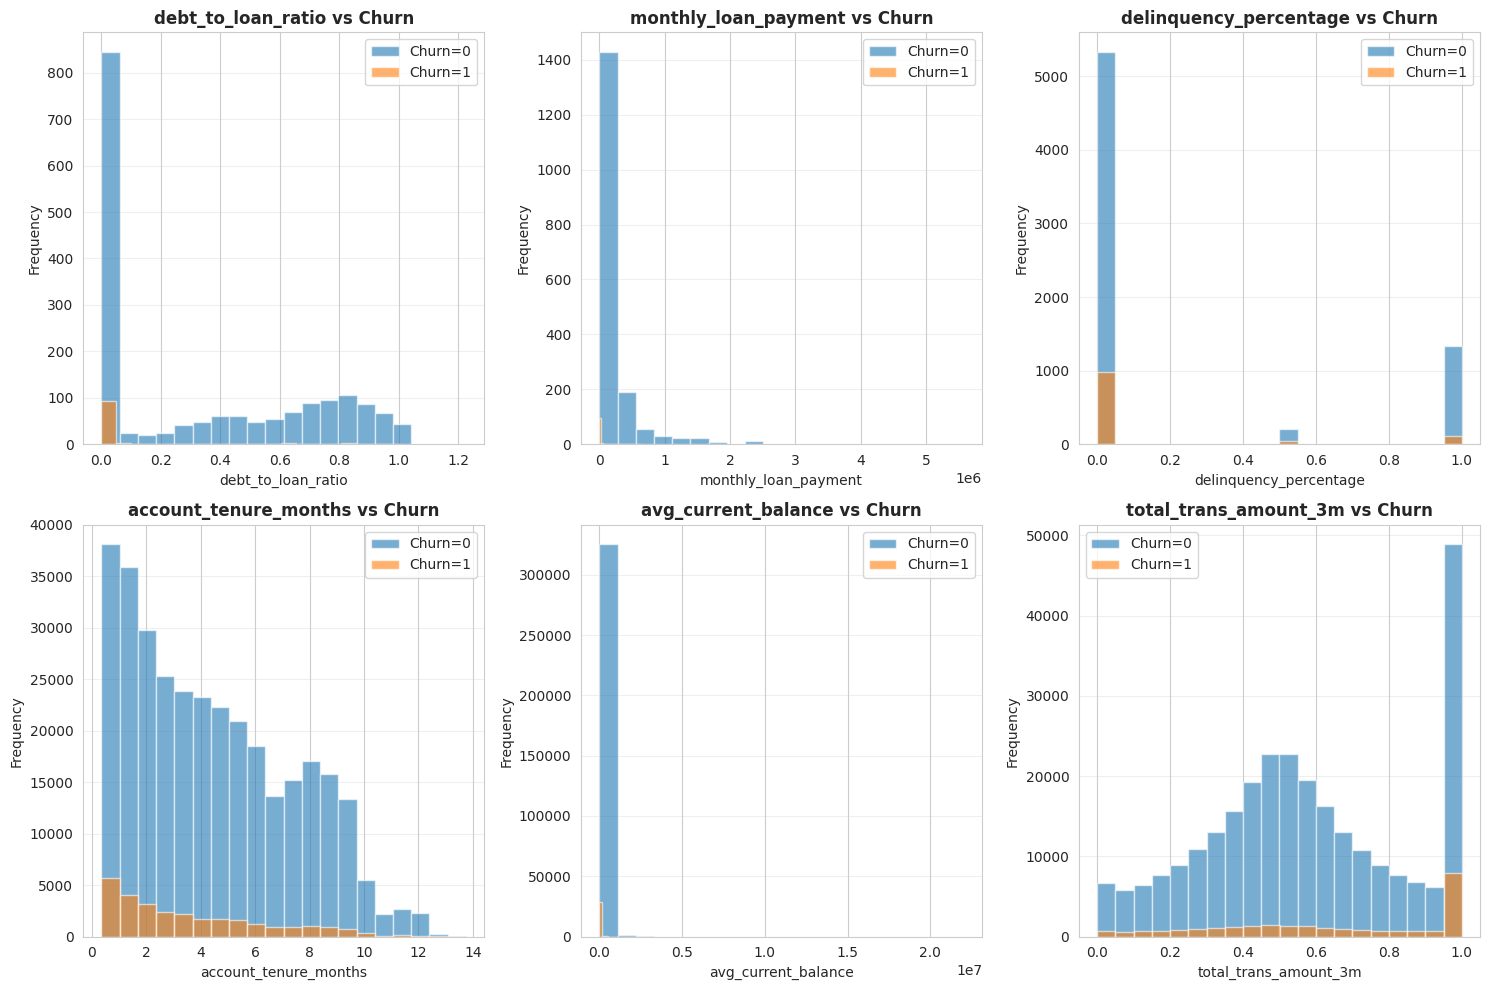

In [ ]:
print("=" * 80)
print("FEATURE RELATIONSHIPS WITH CHURN")
print("=" * 80)

# Select top 6 features most correlated with churn
top_features = target_correlation.drop('churn').abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(top_features):
    for churn_val in [0, 1]:
        axes[i].hist(df[df['churn'] == churn_val][col].dropna(),
                     bins=20, alpha=0.6, label=f'Churn={churn_val}')
    axes[i].set_title(f'{col} vs Churn', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

AGE ANALYSIS

Age Statistics by Churn:
          count        mean         std    min    25%    50%    75%     max
churn                                                                      
0      326265.0  458.821130  136.033040  168.0  348.0  432.0  552.0  1128.0
1       28925.0  438.276508  139.514747  168.0  336.0  408.0  528.0  1056.0


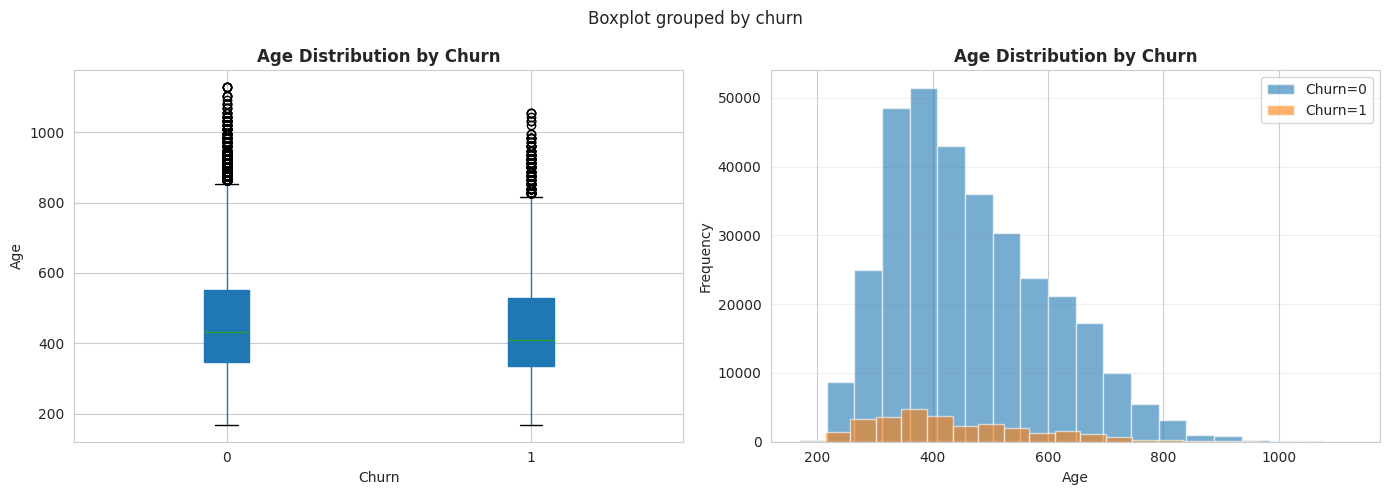

In [ ]:
print("=" * 80)
print("AGE ANALYSIS")
print("=" * 80)

if 'age' in df.columns:
    # Age statistics by churn
    age_by_churn = df.groupby('churn')['age'].describe()
    print("\nAge Statistics by Churn:")
    print(age_by_churn)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Box plot
    df.boxplot(column='age', by='churn', ax=axes[0], patch_artist=True)
    axes[0].set_title('Age Distribution by Churn', fontweight='bold')
    axes[0].set_xlabel('Churn')
    axes[0].set_ylabel('Age')

    # Histogram
    for churn_val in [0, 1]:
        axes[1].hist(df[df['churn'] == churn_val]['age'].dropna(),
                     bins=20, alpha=0.6, label=f'Churn={churn_val}')
    axes[1].set_title('Age Distribution by Churn', fontweight='bold')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()


In [ ]:
print("\n" + "=" * 80)
print("EDA SUMMARY REPORT")
print("=" * 80)

print(f"\n📊 Dataset Overview:")
print(f"   - Total Customers: {len(df):,}")
print(f"   - Total Features: {len(df.columns)}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")

print(f"\n📊 Target Variable (Churn):")
churn_rate = (df['churn'].sum() / len(df)) * 100
print(f"   - Churn Rate: {churn_rate:.2f}%")
print(f"   - Retention Rate: {100-churn_rate:.2f}%")

print(f"\n📊 Data Quality:")
total_missing = df.isnull().sum().sum()
print(f"   - Missing Values: {total_missing}")
if total_missing == 0:
    print(f"   - Status: ✅ No missing values")
else:
    print(f"   - Status: ⚠️ Missing values found")

print(f"\n📊 Top 5 Most Important Features (by correlation):")
top_5 = target_correlation.drop('churn').abs().sort_values(ascending=False).head(5)
for i, (feature, corr) in enumerate(top_5.items(), 1):
    print(f"   {i}. {feature}: {corr:.3f}")

print("\n" + "=" * 80)
print("✅ EDA COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\n💡 Next Steps:")
print("=" * 80)


EDA SUMMARY REPORT

📊 Dataset Overview:
   - Total Customers: 355,190
   - Total Features: 25
   - Numerical Features: 20
   - Categorical Features: 3

📊 Target Variable (Churn):
   - Churn Rate: 8.14%
   - Retention Rate: 91.86%

📊 Data Quality:
   - Missing Values: 2832711
   - Status: ⚠️ Missing values found

📊 Top 5 Most Important Features (by correlation):
   1. debt_to_loan_ratio: 0.166
   2. monthly_loan_payment: 0.087
   3. delinquency_percentage: 0.086
   4. account_tenure_months: 0.082
   5. avg_current_balance: 0.075

✅ EDA COMPLETED SUCCESSFULLY!

